In [38]:
import nltk
from nltk import FreqDist

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from unidecode import unidecode

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
filename = "../DATA/ANALYSIS/all_reviews_all_companies_translated.xlsx"

df = pd.read_excel(filename, index_col=0, engine="openpyxl").fillna("")
df.head()

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,company,review_id,rating_star,date,title,review,customer_location,n_reviews_customer_hide,is_verified,verification_source_hide,review_source_hide,verification_level_hide,reply_content_hide,rating_star_cleaned_hide,n_reviews_customer_cleaned_hide,date_year_month_hide,text_cleaned_hide,page,text_cleaned_hide_EN
0,Lauritz.com,6062edd1f85d7508703d58f0,1 étoile : mauvais,2021-03-30T09:22:25+00:00,Håbløst og ulovligt !,Håbløst !\nSender dem en mail om fortrydelse og får intet svar. Må rykke i en uge. Køber et teak bord som viser sig at være palisander og nogle palisander skabe som stinker af røg!\nFordi jeg samt...,DK,26 avis,False,,,,,1,2,2021-03,håbløst og ulovligt ! håbløst !\nsender dem en mail om fortrydelse og får intet svar. må rykke i en uge. køber et teak bord som viser sig at være palisander og nogle palisander skabe som stinker a...,1,hopelessly and illegal! hopeless !\nSends them an email on regret and get no answer. May jerk for a week. Buyer a teak table that turns out to be rosewood and some rosewood cabinets like stinks of...
1,Lauritz.com,606218d2f85d7508703c5d8c,5 étoiles : excellent,2021-03-29T18:13:38+00:00,er fuldstændig styr på det hele,,DK,18 avis,False,,,,,5,1,2021-03,er fuldstændig styr på det hele,1,is complete track of it all
2,Lauritz.com,60616a7ff85d7508703acce2,3 étoiles : moyen,2021-03-29T05:49:51+00:00,Lauritz .com har et gevaldigt problem…,Lauritz .com har et gevaldigt problem med transportøren. Det er ALT for dyrt og ALT for langsomt!\nHvorfor skal jeg vente en uge på lev. fra Århus til jeres afdeling i Herlev og betale mere end 38...,DK,10 avis,False,,,,,3,1,2021-03,lauritz .com har et gevaldigt problem… lauritz .com har et gevaldigt problem med transportøren. det er alt for dyrt og alt for langsomt!\nhvorfor skal jeg vente en uge på lev. fra århus til jeres ...,1,Lauritz .com has a tremendous problem ... Lauritz .com has a tremendous problem with the carrier. It's too expensive and too slow!\nWhy should I wait a week in Lev. From Aarhus to your department ...
3,Lauritz.com,605cdf6af85d750870350ea5,1 étoile : mauvais,2021-03-25T19:07:22+00:00,Jeg har købt en vare via jeres auktion,"Jeg har købt en vare via jeres auktion, og min oplevelse med jeres kundeservice i den forbindelse lader mildt sagt en hel del tilbage at ønske – ja, jeg vil endda sige at servicen var under al kri...",DK,1 avis,False,,,,,1,1,2021-03,"jeg har købt en vare via jeres auktion jeg har købt en vare via jeres auktion, og min oplevelse med jeres kundeservice i den forbindelse lader mildt sagt en hel del tilbage at ønske – ja, jeg vil ...",1,"I bought an item through your auction I have bought an item through your auction, and my experience with your customer service in this connection lets mildly said a great deal to want - yes, I wou..."
4,Lauritz.com,605bb816f85d750870332126,5 étoiles : excellent,2021-03-24T22:07:18+00:00,Det positive først,"Det positive først. 2 gange indenfor relativ kort tid har jeg solgt 2 genstande på Lauritz.com, Aarhus. Begge gange med hammerslag over vurderingen, og \nvel at mærke begge gange med en værdi over...",DK,1 avis,False,,,,"Kære Per Jensen.\nTusind tak for den gode anmeldelse, og fordi du tager dig tid til at skrive den. Det betyder meget for os.\nDu har ret i, at fragtpriser kan være en barriere for at handle i vore...",5,1,2021-03,"det positive først det positive først. 2 gange indenfor relativ kort tid har jeg solgt 2 genstande på lauritz.com, aarhus. begge gange med hammerslag over vurderingen, og \nvel at mærke begge gang...",1,"It first positively the positive first. 2 times within relatively short time I have sold 2 objects on Lauritz.com, Aarhus. both times with hammer layer over the assessment, and\nTo mark both times..."


In [53]:
# function to remove stopwords
stop_words = [unidecode(w.lower()) for w in stop_words]
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev.lower().split() if i not in stop_words and len(i)>3])
    return rev_new

df["reviews_cleaned"] = df['text_cleaned_hide_EN'].copy()

# clean reviews
df["reviews_cleaned"] = df['reviews_cleaned'].apply(lambda x: " " + ' '.join([unidecode(w.lower()) for w in x.split()]))

words_toremove = ["lauritzcom","lauritz", "dba", "tradera", "block", 
                  "auction", "good"]

for word in words_toremove:
    df["reviews_cleaned"] = df["reviews_cleaned"].apply(lambda x: re.sub(f"{word}", " ", x))

# remove stopwords from the text
df["reviews_cleaned"] = df["reviews_cleaned"].apply(remove_stopwords)
# reviews = [remove_stopwords(r.split()) for r in df['review_all']]

df["reviews_cleaned"] = df["reviews_cleaned"].apply(lambda x: re.sub(r"[^a-z\s]", "", x))

# # make entire text lowercase
# reviews = " ".join([r.lower() for r in reviews])

df["reviews_cleaned"] = df["reviews_cleaned"].apply(lambda x: re.sub(r"\s+", " ", x))

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


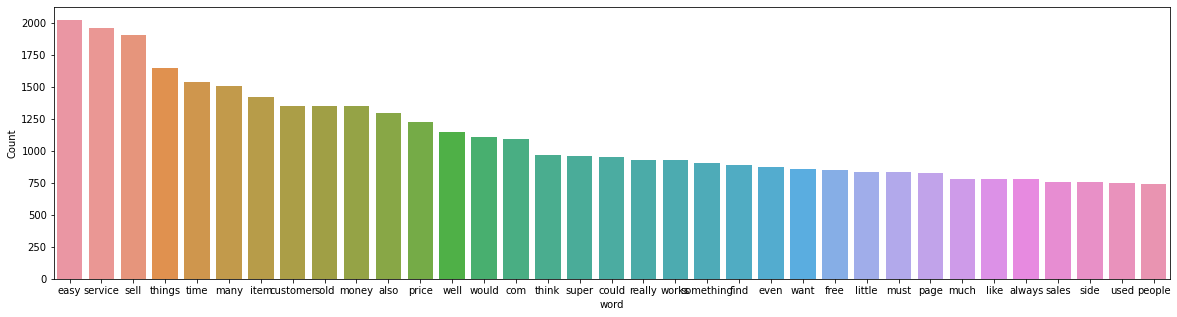

In [44]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()


freq_words(df["reviews_cleaned"], 35)

In [45]:
nlp = spacy.load('en_core_web_sm')#, disable=['parser', 'ner'])
# nlp = spacy.load('fr', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'VERB', "PROPN"]): # filter noun etc.
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
def lemmatize_reviews(df):
    reviews = list(df["reviews_cleaned"])

    tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
#     print(tokenized_reviews[1])

    lem_reviews = lemmatization(tokenized_reviews)
#     print(reviews_2[1]) # print lemmatized review
    
    return lem_reviews

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
def get_model(lem_reviews):
    dictionary = corpora.Dictionary(lem_reviews)

    doc_term_matrix = [dictionary.doc2bow(rev) for rev in lem_reviews]

    # Creating the object for LDA model using gensim library
    LDA = gensim.models.ldamodel.LdaModel

    # Build LDA model
    lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                    chunksize=1000, passes=50)
    
    return lda_model, doc_term_matrix, dictionary

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
def create_model(df):
    lem_reviews = lemmatize_reviews(df)
    return get_model(lem_reviews)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
def show_model(df):
    lda_model, doc_term_matrix, dictionary = create_model(df)

    lda_model.print_topics()

    # Visualize the topics
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
    return vis

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
show_model(df)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.008504  0.133811       1        1  28.522132
0     -0.167818 -0.029297       2        1  22.420382
3     -0.257627 -0.043996       3        1  20.958112
4      0.068831  0.043594       4        1  11.976927
2      0.184486  0.179656       5        1   9.134852
5      0.180632 -0.283768       6        1   6.987595, topic_info=            Term         Freq        Total Category  logprob  loglift
124         sell  3404.000000  3404.000000  Default  30.0000  30.0000
125      service  1958.000000  1958.000000  Default  29.0000  29.0000
79      customer  1714.000000  1714.000000  Default  28.0000  28.0000
48         price  1370.000000  1370.000000  Default  27.0000  27.0000
591         page   977.000000   977.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
394          bid    59.173623   190.512401   Topic6  -5.2368   1.4918
306  description    57.877743   215.058590   Topic6  -5.2590   1.3485
201         star    57.581166   350.492798   Topic6  -5.2641   0.8549
88          find    61.722715  1145.321968   Topic6  -5.1947  -0.2598
153        could    55.326826   822.787435   Topic6  -5.3041  -0.0384

[390 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
767       1  0.414992       account
767       2  0.033199       account
767       3  0.549865       account
202       1  0.210488           act
202       2  0.356211           act
...     ...       ...           ...
593       2  0.120454          year
593       4  0.029722          year
593       5  0.082910          year
1362      1  0.993603        yellow
4010      6  0.981028  yellowgratis

[541 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 3, 6])